In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 384 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 28.66 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Checking out files: 100% (3783/3783), done.


In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
# %matplotlib inline
import tensorflow as tf 
from tensorflow import keras

In [4]:
# Loading images
from tensorflow.keras.preprocessing.image import load_img

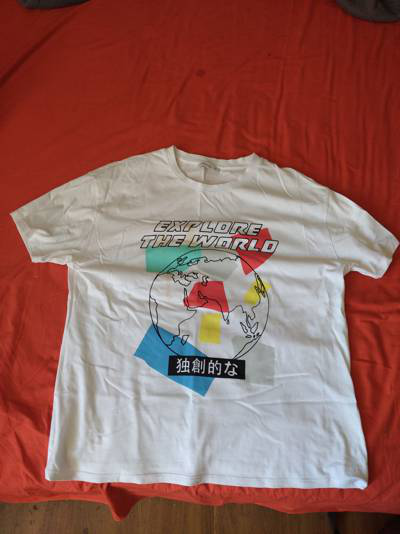

In [9]:
path = '/content/clothing-dataset-small/train/t-shirt'
name = '/content/clothing-dataset-small/train/t-shirt/00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg'
name2 = '00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg'
fullname = path + '/' + name2
# load_img(name)  Both are same
load_img(fullname)

To use this image in a neural network, we need to resize it because the models always expect 
images of certain size. For example, the network we’ll use in this chapter requires an 150x150 
image or an 299x299 image. 


`target_size` parameter

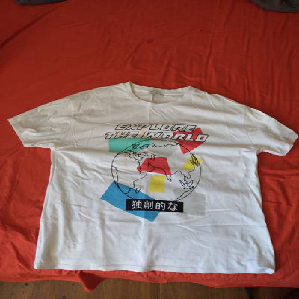

In [12]:
load_img(fullname, target_size=(299,299))

`Convolutional neural network (CNN)` can find patterns in images and we can use them to make predictions.

In [14]:
# using 'Xception' model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input  # prepare images to be used by model
from tensorflow.keras.applications.xception import decode_predictions  # decoding model's prediction

In [16]:
model = Xception(
    weights='imagenet',
    input_shape=(299,299,3)  # 3 is colour in image, Xception is trained on RGB therfore 3.
)

In [21]:
img = load_img(fullname, target_size=(299,299))

In [22]:
x = np.array(img)

In [23]:
x.shape

(299, 299, 3)

• The width of the image — 299  
• The height of the image — 299    
• The number of channels — red, green, blue

While training the model, there will be several images, we will be requiring 4 dimensions.
* Number of images
* Width of image
* Height of image
* Number of channel

In [28]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [32]:
X = preprocess_input(X)  # This converts the values between -1 to 1

In [31]:
X # ready to use the model

array([[[[-0.18431371, -0.84313726, -0.92156863],
         [-0.17647058, -0.8352941 , -0.9137255 ],
         [-0.17647058, -0.8352941 , -0.9137255 ],
         ...,
         [-0.6627451 , -0.7254902 , -0.7411765 ],
         [-0.67058825, -0.73333335, -0.7490196 ],
         [-0.69411767, -0.75686276, -0.77254903]],

        [[-0.17647058, -0.8352941 , -0.9137255 ],
         [-0.17647058, -0.8352941 , -0.9137255 ],
         [-0.16862744, -0.827451  , -0.90588236],
         ...,
         [-0.6784314 , -0.7411765 , -0.75686276],
         [-0.6784314 , -0.7411765 , -0.75686276],
         [-0.6862745 , -0.7490196 , -0.7647059 ]],

        [[-0.16862744, -0.827451  , -0.90588236],
         [-0.16862744, -0.827451  , -0.90588236],
         [-0.1607843 , -0.81960785, -0.8980392 ],
         ...,
         [-0.67058825, -0.73333335, -0.7490196 ],
         [-0.6784314 , -0.7411765 , -0.75686276],
         [-0.7019608 , -0.7647059 , -0.78039217]],

        ...,

        [[-0.3098039 , -0.47450978, -0

In [33]:
pred = model.predict(X)

In [34]:
pred.shape

(1, 1000)

In [37]:
pred[0,:10]

array([0.0005187 , 0.0010937 , 0.00058755, 0.00122642, 0.001186  ,
       0.0003733 , 0.00035856, 0.00024881, 0.00012114, 0.00027722],
      dtype=float32)